In [1]:
import matplotlib.pyplot as plt
import albumentations as A
from src.dataset import ADE20KDataset, SimpleWallADE20KDataset
from src import config
from src.transform import get_preprocessing_transform, get_train_augmentations, get_val_augmentations

In [2]:
def display_sample_information(dataset, idx, show_mask=True):
    image, mask = dataset[idx]
    scene = dataset.index['scene'][idx]
    folder = dataset.index['folder'][idx]
    filename = dataset.index['filename'][idx]

    if image.shape[0] == 3:
        image = image.transpose((1, 2, 0))

    plt.figure()
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'{scene}: {folder}/{filename}')

    if show_mask:
        if len(mask.shape) == 3:
            mask = mask.squeeze(axis=0)
        plt.figure()
        plt.imshow(mask)
        plt.axis('off')

In [3]:
all_dataset = ADE20KDataset(config.DATA_ROOT, mode='all')
len(all_dataset)

27574

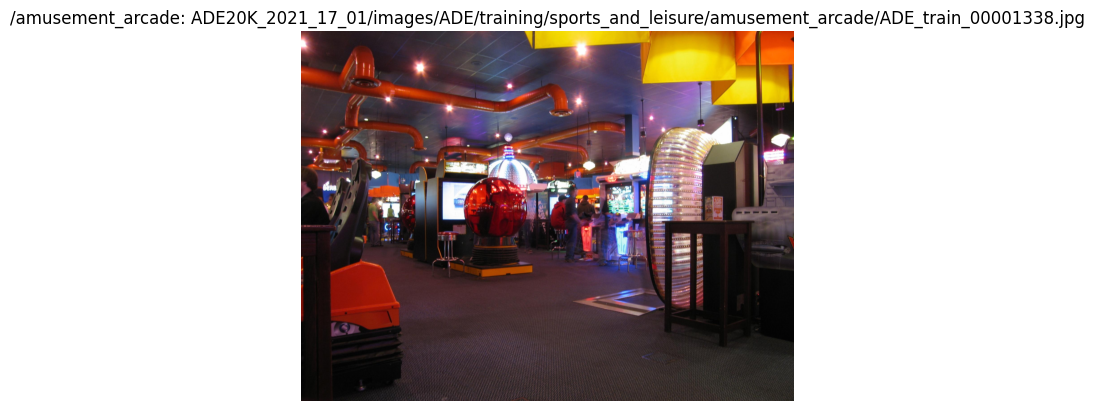

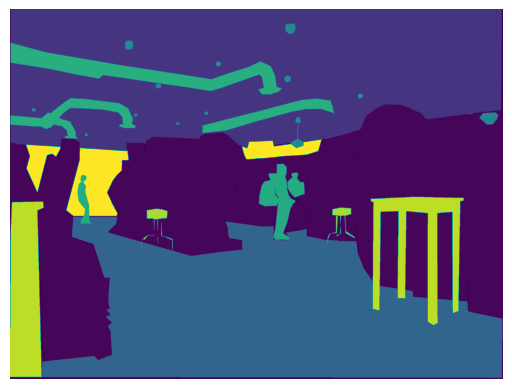

In [4]:
display_sample_information(all_dataset, 1337)

In [5]:
train_dataset = ADE20KDataset(config.DATA_ROOT, mode='train')
len(train_dataset)

25574

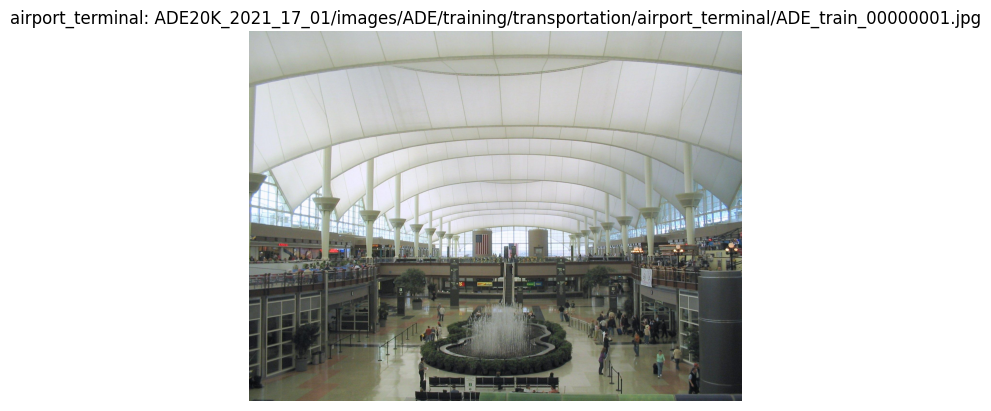

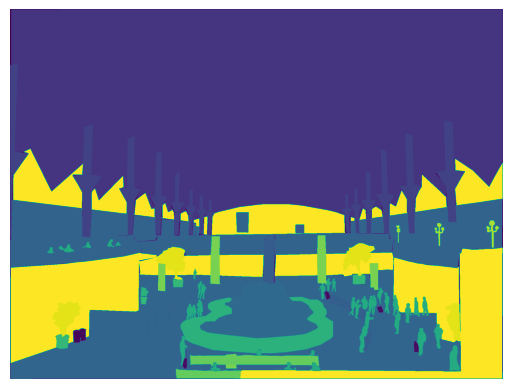

In [6]:
display_sample_information(train_dataset, 0)

In [7]:
val_dataset = ADE20KDataset(config.DATA_ROOT, mode='val')
len(val_dataset)

2000

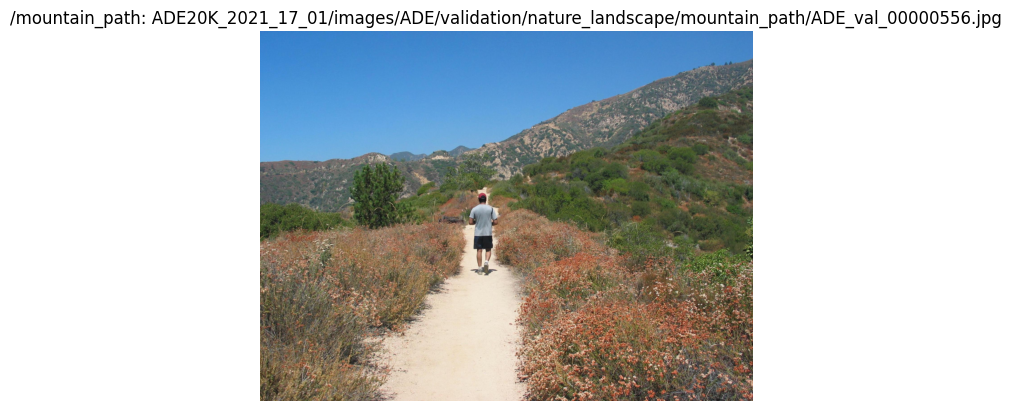

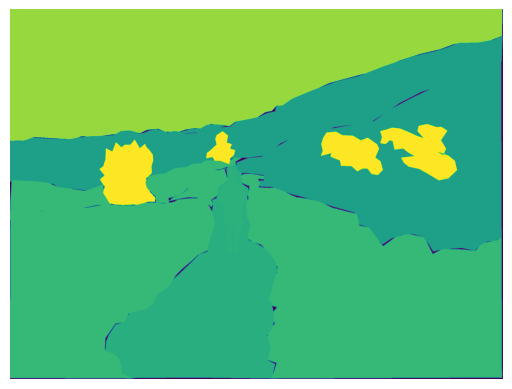

In [8]:
display_sample_information(val_dataset, 555)

In [9]:
train_simple_wall_dataset = SimpleWallADE20KDataset(config.DATA_ROOT, mode='train')
len(train_simple_wall_dataset)

11035

In [10]:
val_simple_wall_dataset = SimpleWallADE20KDataset(config.DATA_ROOT, mode='val')
len(train_simple_wall_dataset)

11035

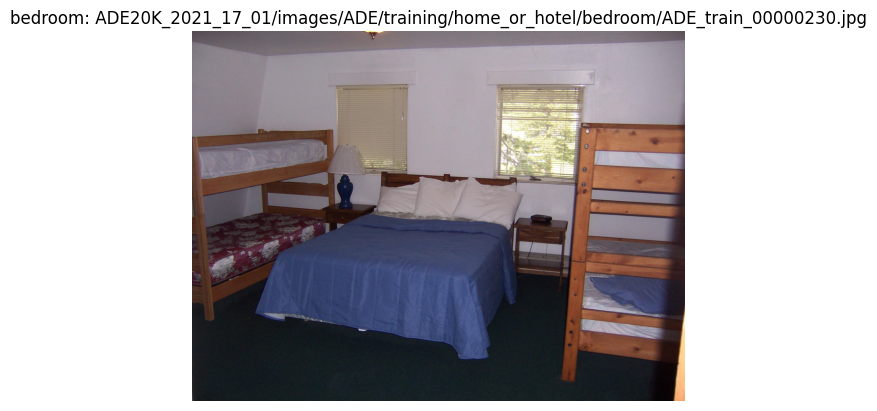

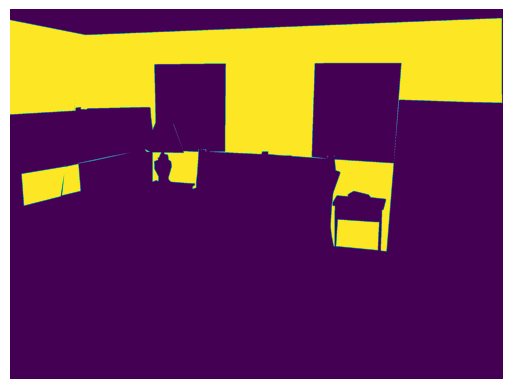

In [11]:
display_sample_information(train_simple_wall_dataset, 224)

In [12]:
all_simple_wall_dataset = SimpleWallADE20KDataset(config.DATA_ROOT, mode='all')
len(all_simple_wall_dataset)

12004

In [13]:
# Not filtering scenes. This will include all samples that have 'wall' label in their mask
len(SimpleWallADE20KDataset(config.DATA_ROOT, mode='all', filter_scenes=False))

14701

In [14]:
mini_simple_wall_dataset = SimpleWallADE20KDataset(config.DATA_ROOT, mode='all', length=200)
len(mini_simple_wall_dataset)

200

### Augmentation

In [15]:
aug_dataset = SimpleWallADE20KDataset(
    config.DATA_ROOT,
    mode='all',
    length=200,
    augmentation_fn=get_train_augmentations(),
)

/home/ricardsku/miniconda3/envs/ml/lib/python3.10/site-packages/albumentations/augmentations/transforms.py:1149: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/ricardsku/miniconda3/envs/ml/lib/python3.10/site-packages/albumentations/augmentations/transforms.py:1175: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


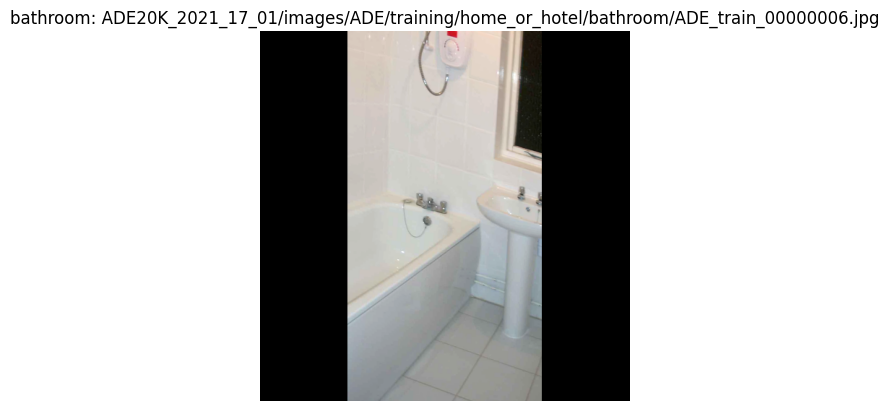

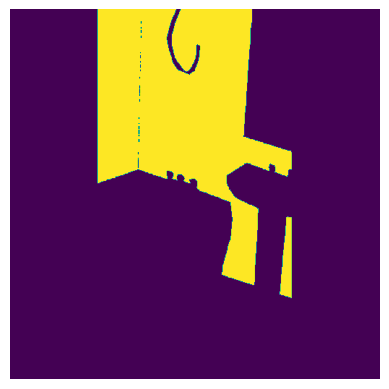

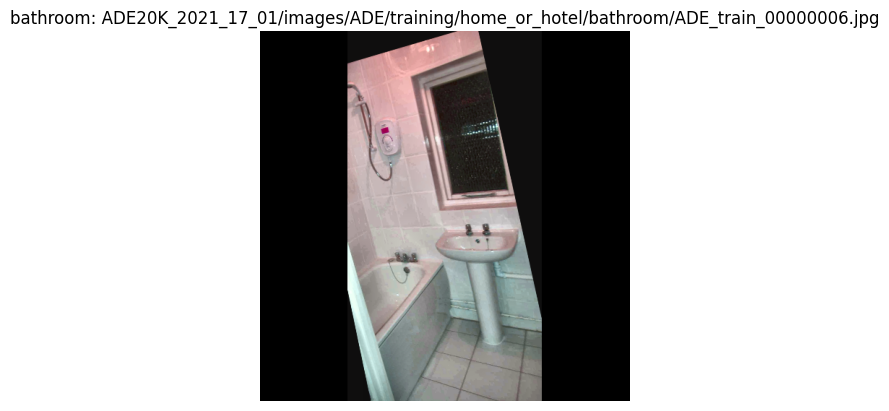

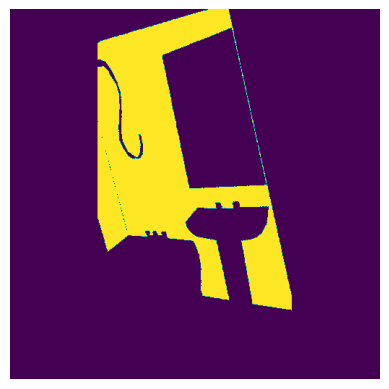

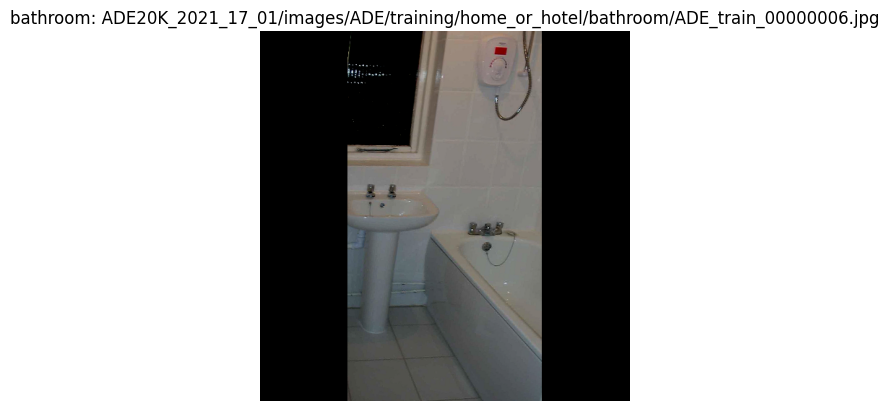

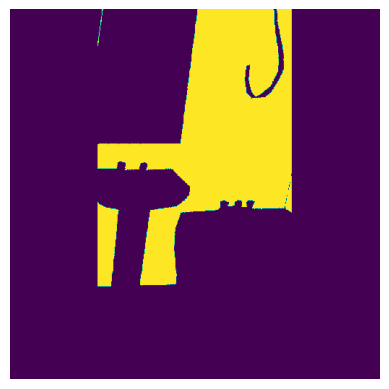

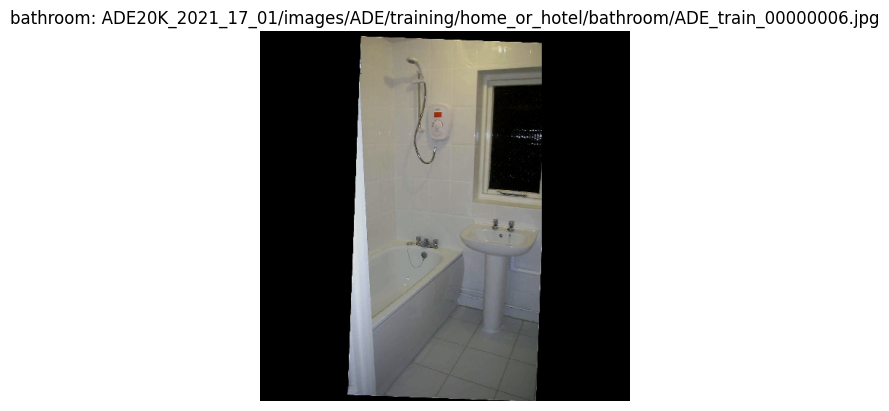

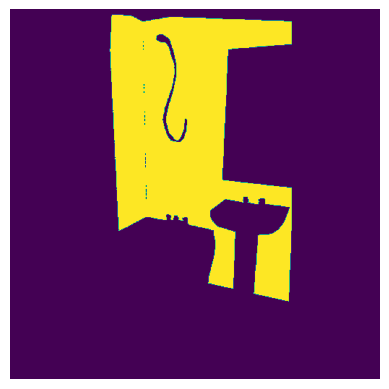

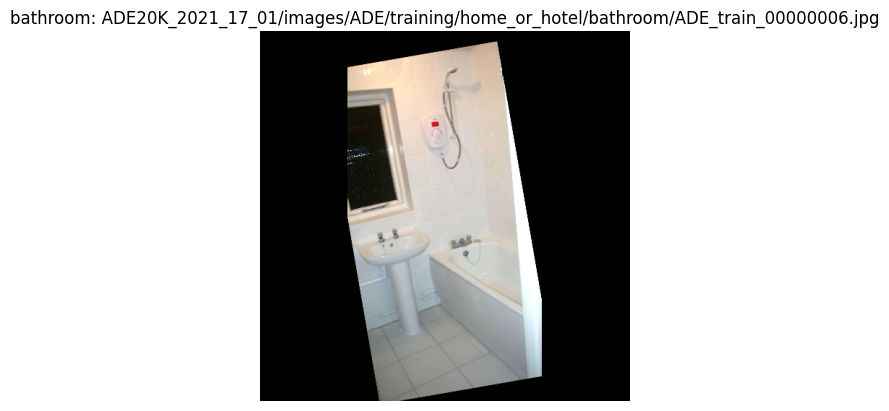

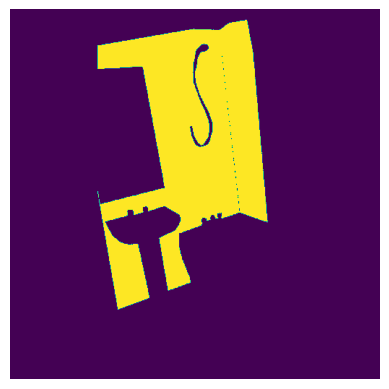

In [16]:
idx = 1
display_sample_information(aug_dataset, idx)
display_sample_information(aug_dataset, idx)
display_sample_information(aug_dataset, idx)
display_sample_information(aug_dataset, idx)
display_sample_information(aug_dataset, idx)

In [17]:
pre_dataset = SimpleWallADE20KDataset(
    config.DATA_ROOT,
    mode='all',
    length=200,
    # augmentation_fn=train_augmentations,
    augmentation_fn=get_train_augmentations(),
    preprocessing_fn=get_preprocessing_transform('mobileone_s1'),
)

In [18]:
image, mask = pre_dataset[0]
type(image), image.shape, (image.min(), image.max()), image.dtype, mask.shape

(numpy.ndarray,
 (3, 512, 512),
 (-2.117904, 2.64),
 dtype('float32'),
 (1, 512, 512))

In [19]:
augmentation = A.ShiftScaleRotate(
    scale_limit=0.2,
    rotate_limit=15,
    shift_limit=0.1,
    p=1,
    border_mode=0
)